In [2]:
import pandas as pd

In [24]:
import Users\Lukas\Documents\GitHub\ProSRL\src\pysrl\cluster\clustering

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_14848/4254667433.py, line 1)

In [3]:
# Load the trafo data from data_trafo.csv
df = pd.read_csv("C:/Users/Lukas/Documents/GitHub/ProSRL/data/data_trafo.csv").iloc[:, 1:]

In [4]:
df.head()

,User,Category,Label,ResponsTask,TestResQual,TestResQuant,SecSpent,TotSec,LearnType,Level,UserCumSec,difficulty
0,0,-1,Startseite,-1,-1,-1,18,31,6,-1,18,-1
1,0,-1,Tour,-1,-1,-1,4,49,6,-1,22,-1
2,0,-1,Übersicht,-1,-1,-1,85,53,6,-1,107,-1
3,0,0,ks1a,-1,-1,-1,4,138,6,0,111,-1
4,0,0,ka1a1,-1,-1,-1,90,142,4,0,201,-1


In [5]:
df.describe()

,User,Category,ResponsTask,TestResQual,TestResQuant,SecSpent,TotSec,LearnType,Level,UserCumSec,difficulty
count,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6.619000e+03,6.619000e+03,6619.000000,6619.000000,6.619000e+03,6619.000000
mean,23.106965,1.372111,-0.800574,-0.967216,-0.040489,8.404389e+03,1.094398e+07,3.921287,0.037770,3.191829e+05,-0.846502
std,13.518432,1.495763,0.699993,0.283495,8.280216,2.064998e+05,7.135984e+06,1.645437,0.193017,8.485008e+05,0.561703
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000,9.000000e+00,-1.000000
25%,11.000000,0.000000,-1.000000,-1.000000,-1.000000,8.000000e+00,2.591066e+06,3.000000,0.000000,9.410000e+02,-1.000000
50%,22.000000,1.000000,-1.000000,-1.000000,-1.000000,2.400000e+01,1.607312e+07,4.000000,0.000000,2.384000e+03,-1.000000
75%,35.000000,2.000000,-1.000000,-1.000000,-1.000000,6.700000e+01,1.623489e+07,5.000000,0.000000,8.057350e+04,-1.000000
max,46.000000,5.000000,2.000000,2.000000,100.000000,1.347602e+07,1.628869e+07,6.000000,1.000000,1.347903e+07,2.000000


In [6]:
df = df[['SecSpent', 'TotSec', 'User', 'Category', 'LearnType', 'ResponsTask', 'difficulty', 'Level', 'Label', 'TestResQual']]

In [7]:
df[df['TestResQual'] >= 0].count()

SecSpent       94
TotSec         94
User           94
Category       94
LearnType      94
ResponsTask    94
difficulty     94
Level          94
Label          94
TestResQual    94
dtype: int64

In [8]:
df_user = df.groupby('User')

#df_mikro = pd.DataFrame(columns=['User', 'PrevAct', 'Test', 'TestResQual', 'NextAct'])
df_mikro = []
for user in df_user:
    index_tests = user[1].loc[user[1].iloc[:,9] >= 0].index
    
    for index in index_tests:
        next_index = 2 if df.loc[index]['Label'] != df.loc[index+1]['Label'] else 3
        next_index += 1 if df.loc[index+next_index]['Label'] == 'Rückmeldungen' else 0
        df_mikro.append([user[0],
                        df.loc[index-3]['Category'],
                        df.loc[index-1]['Category'],
                        df.loc[index]['TestResQual'],
                        df.loc[index+next_index]['Category']])
        
        #print(user[1].loc[index]['User'])
df_mikro = pd.DataFrame(df_mikro, columns=['User', 'PrevAct', 'Test', 'TestResQual', 'NextAct'])

df_mikro[df_mikro['NextAct'] != df_mikro['PrevAct']]

,User,PrevAct,Test,TestResQual,NextAct
0,0,1,1,1,0
4,4,0,0,0,1
5,4,0,1,1,4
6,5,5,0,1,0
7,7,0,0,2,1
9,7,1,1,1,2
10,8,2,2,1,3
14,10,1,1,1,2
16,11,0,0,2,1
18,11,2,2,2,3


In [9]:
import warnings

import seaborn as sns
from plotly.io import write_image
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt

#from .cluster_plot_help_fcts import *
#from .cluster_fcts import load_prep_data
    
#from ..config.constants import RESULTS_PATH

pd.options.mode.chained_assignment = None  # default='warn'

In [10]:
def correlation_heatmap(features=None, df=None, save=False, dpi=300, 
                        filename='cor_heatmap', cbar=False,
                        all_with_these_features=False):
    """Heatmap of all correlations of the prepared dataframe

    Args:
        features (list): The features to which all correlations are shown
        df (any): The data to plot, if None it will be loaded from data prep
        save (bool): Whether to save the plot
        dpi (int): Dots per inch to save the plot
        filename (str): The filename to save the plot
        cbar (bool): Whether to show the colorbar
        all_with_these_features (bool): Show all cors of given features

    """    
    if df is None:
        df = load_prep_data()
        
    df = df.drop(['User'], axis=1)
               
    if features is None:
        features = df.columns
    
    if isinstance(features, str):
        features = [features]

    if not all_with_these_features:
        df = df[features]
        
    fig = plt.figure(figsize=(len(features), len(df.columns)/4+2))
    sns.heatmap(df.corr()[features], annot=True, fmt='.3f', vmin=-1, vmax=1,
                cbar=cbar)
    plt.suptitle('Feature correlation heatmap', fontweight='bold')

    #path = os.path.join(RESULTS_PATH, 'heatmaps', filename)
    #save_figure(save, dpi, path, fig)
    
    plt.show()

In [11]:
def user_heatmap(user=None, features=None, df=None, save=False, dpi=300, 
                 filename='user_heatmap', cbar=False):
    """Heatmap of all features for given set of users

    Args:
        user (list): The users to show
        features (list): The features to show
        df (any): The data to plot, if None it will be loaded from data prep
        save (bool): Whether to save the plot
        dpi (int): Dots per inch to save the plot
        filename (str): The filename to save the plot
        cbar (bool): Whether to show the colorbar

    """
    if isinstance(user, int):
        user = [user]
        
    if isinstance(features, int):
        features = [features]
        
    if df is None:
        df = load_prep_data()
        
    scaled_df = df.drop(['User'], axis=1)
    scaled_df = StandardScaler().fit_transform(scaled_df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns[1:])
    
    if user is not None:
        df = df[df['User'].isin(user)]
        scaled_df = scaled_df[df['User'].isin(user)]
        
    if features is not None:
        df = df[features]
        scaled_df = scaled_df[features]
    else:
        df = df.drop(['User'], axis=1)
    
    if len(df.columns) > len(df.index):
        df = df.transpose()
        scaled_df = scaled_df.transpose()
    
    rows = max(len(df.columns), len(df.index))
    cols = min(len(df.columns), len(df.index))
    fig = plt.figure(figsize=(cols, rows/4+2))
    sns.heatmap(scaled_df, annot=df, fmt='.3f', vmin=-3, vmax=3, cbar=cbar)
    plt.suptitle('User feature heatmap', fontweight='bold')
    
    #path = os.path.join(RESULTS_PATH, 'heatmaps', filename)
    #save_figure(save, dpi, path, fig)
    
    plt.show()

In [12]:
def cluster_pairs_plot(pairs: list[pd.DataFrame], labels: pd.DataFrame,
                       abline=False, save=True, path="", dpi=300,
                       user_ids=None, show_cluster_of=None) -> list:
    """Plot the kmeans clustering result for a pair of features

    Args:
        pairs (list[pd.DataFrame]): The input dataframes to be plotted
        labels (pd.DataFrame): Df with labels for each kmeans result
        abline (bool): Whether to show bisector line in the plot
        save (bool): Whether to save the figure
        path (string): Path to save the figure
        dpi (int): Dots per inch for saving the figure
        user_ids (any): User ids to annotate in the plot, uses index if None
        show_cluster_of (list): Feature combi whose clusters shown in all plots

    """
    ax = init_subplots_plot(len(pairs))
    label = get_color_label(show_cluster_of, labels)

    for idx, data in enumerate(pairs):

        c_ax = get_current_axis(pairs, ax, idx)

        x_data, y_data = data.iloc[:, 0], data.iloc[:, 1]
        x_tag, y_tag = data.columns[0], data.columns[1]
        if show_cluster_of is None or len(label) == 0:
            if (x_tag, y_tag) in labels.columns:
                c_label = [i + 1 for i in labels[(x_tag, y_tag)]]
            else:
                c_label = [i + 1 for i in labels.iloc[:, 0]]
        else:
            c_label = label
        legend = True if idx == 0 else False
        sns.scatterplot(x=x_data, y=y_data, ax=c_ax, hue=c_label,
                        palette="tab10", legend=legend, s=60)

        user_ids = data.index if user_ids is None else user_ids
        for i, j in enumerate(user_ids):
            c_ax.annotate(str(j), [list(x_data)[i], list(y_data)[i]],
                          horizontalalignment='center',
                          verticalalignment='center', size=5)

        c_ax.set_title(f"{x_tag} vs {y_tag}", fontweight='semibold')
        set_labels(pairs, x_tag, c_ax, 2, y_tag)
        if abline:
            end = min(max(y_data), max(x_data))
            c_ax.plot([0, end], [0, end], 'r-')

    plt.tight_layout()
    #save_figure(save, dpi, os.path.join(path, "scatterplot"))
    plt.show()

    return ax

In [13]:
def cluster_single_plot(columns: list[pd.DataFrame], labels: pd.DataFrame,
                        save=True, path="", dpi=300, n_bins=20,
                        show_cluster_of=None) -> list:
    """Plot the kmeans clustering result for single features

    Args:
        columns (list[pd.DataFrame]): The input dataframes to be plotted
        labels (list): List of pandas series with labels for each kmeans result
        save (bool): Whether to save the figure
        path (string): Path to save the figure
        dpi (int): Dots per inch for saving the figure
        n_bins (int): Number of bins to show in histogram
        show_cluster_of (list): Feature combi whose clusters shown in all plots
        
    Returns:
        list: List of axes of the plots

    """
    ax = init_subplots_plot(len(columns))

    for idx, data in enumerate(columns):
        c_ax = get_current_axis(list(labels.columns), ax, idx)
        data = data.reset_index().drop('index', axis=1)
        tag = data.columns[0]
        label = [i + 1 for i in labels[(tag,)]]
        data = pd.concat([data.iloc[:, 0], pd.Series(label)], axis=1)
        data.columns = [tag, 'label']
        legend = True if idx == 0 else False
        if len(data[tag].unique()) < 10:
            data['count'] = 1
            data = data.groupby([tag, 'label']).count().reset_index()
            sns.barplot(ax=c_ax, data=data, x=tag, y='count', hue='label', 
                        palette="tab10")
        else:
            sns.histplot(ax=c_ax, data=data, x=tag, hue='label', 
                         multiple='stack', bins=n_bins, palette="tab10", 
                         legend=legend)
        c_ax.set_title(f"{tag}", fontweight='semibold')
        c_ax.set_ylabel("occurrences")
        set_labels(columns, tag, c_ax)

    plt.tight_layout()
    #save_figure(save, dpi, os.path.join(path, "histogram"))
    plt.show()

    return ax

In [14]:
def plot_kmeans_centers(centers: pd.DataFrame, centers_inv: pd.DataFrame,
                        save=True, path="", dpi=300):
    """Plot the centers of the kmeans clustering in terms of a heatmap

    Args:
        centers (pd.DataFrame): The centers determined
        centers_inv (pd.DataFrame): The centers inverse transformed
        save (bool, optional): Whether to save the plot. Defaults to True.
        path (str, optional): The path where to save. Defaults to "".
        dpi (int, optional): The dpi to use for the figure. Defaults to 300.
    
    """
    centers_dfs = get_centers_list(centers)
    centers_inv_dfs = get_centers_list(centers_inv)

    first_df = centers_dfs[0]
    scales = len(first_df.columns) * 1.5, len(first_df.index) * 0.5 + 1

    ax = init_subplots_plot(len(centers_dfs), scales=scales)

    for idx, df in enumerate(centers_dfs):
        c_ax_0 = get_current_axis(centers_dfs, ax, idx)
        df.columns = [c[1] for c in df.columns]
        sns.heatmap(df, ax=c_ax_0, annot=centers_inv_dfs[idx], fmt='.2f',
                    cbar=False)
        
    plt.suptitle('Cluster centers of kMeans', fontweight='bold')
    plt.tight_layout()
    #save_figure(save, dpi, os.path.join(path, "center"))
    plt.show()

In [15]:
def get_color_label(show_cluster_of: list, labels: pd.DataFrame) -> list:
    """Get the proper color labels for the clusters using show_cluster_of

        Args:
            show_cluster_of (list): List of features to show the clusters of
            labels (pd.DataFrame): The user labels of the corresponding clusters

        """
    label = []

    all_cols = ' or '.join([str(list(lab)) for lab in labels.columns])
    warn_m = 'The chosen feature combi in show_cluster_of does not exist, ' \
             'showing individual clusters instead. ' \
             f'\nSelect {all_cols} to show this cluster in each plot.'
    if tuple(show_cluster_of) in list(labels.columns):
        label = list(labels[tuple(show_cluster_of)])
    else:
        warnings.warn(warn_m)

    return label

In [16]:
def init_subplots_plot(n_plots: int, scales=(3.5, 3.2)) -> list:
    """Initialize subplots one for each entry in data_list

    Args:
        n_plots (int): The number of subplots to generate
        scales (tuple): sizes for each row and column in the plot

    Returns:
        list[list[Axis]]: The axis objects for the subplots

    """

    rows = (n_plots - 1) // 3 + 1
    columns = (n_plots - 1) % 3 + 1 if n_plots < 4 or n_plots % 3 == 0 \
        else n_plots % 3 + 1
    while rows * columns < n_plots:
        if columns < 4:
            columns += 1
        else:
            rows += 1
    figsize = (scales[0] * columns, scales[1] * rows)

    _, ax = plt.subplots(rows, columns, figsize=figsize)

    return ax

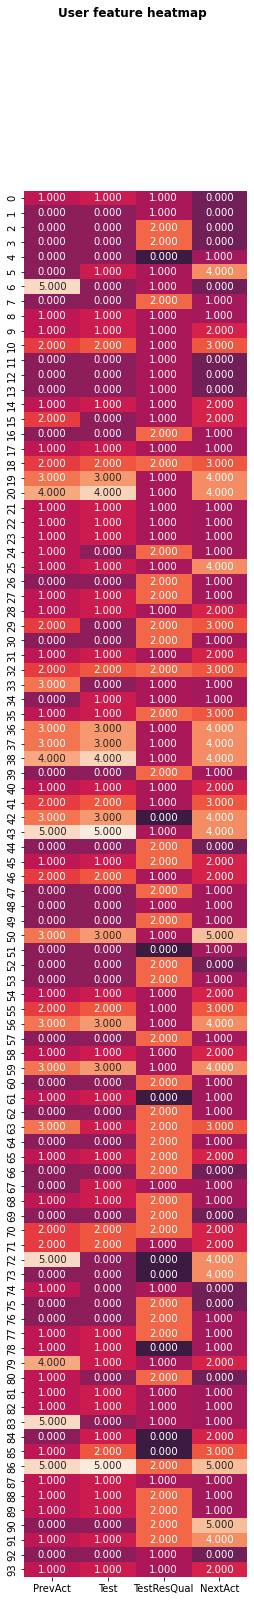

In [17]:
user_heatmap(df=df_mikro)#, all_with_these_features=True)

C:\Users\Lukas\AppData\Local\Temp/ipykernel_14848/3930214160.py:18: UserWarning:

The chosen feature combi in show_cluster_of does not exist, showing individual clusters instead. 
Select ['U', 's', 'e', 'r'] or ['P', 'r', 'e', 'v', 'A', 'c', 't'] or ['T', 'e', 's', 't'] or ['T', 'e', 's', 't', 'R', 'e', 's', 'Q', 'u', 'a', 'l'] or ['N', 'e', 'x', 't', 'A', 'c', 't'] to show this cluster in each plot.



NameError: name 'get_current_axis' is not defined

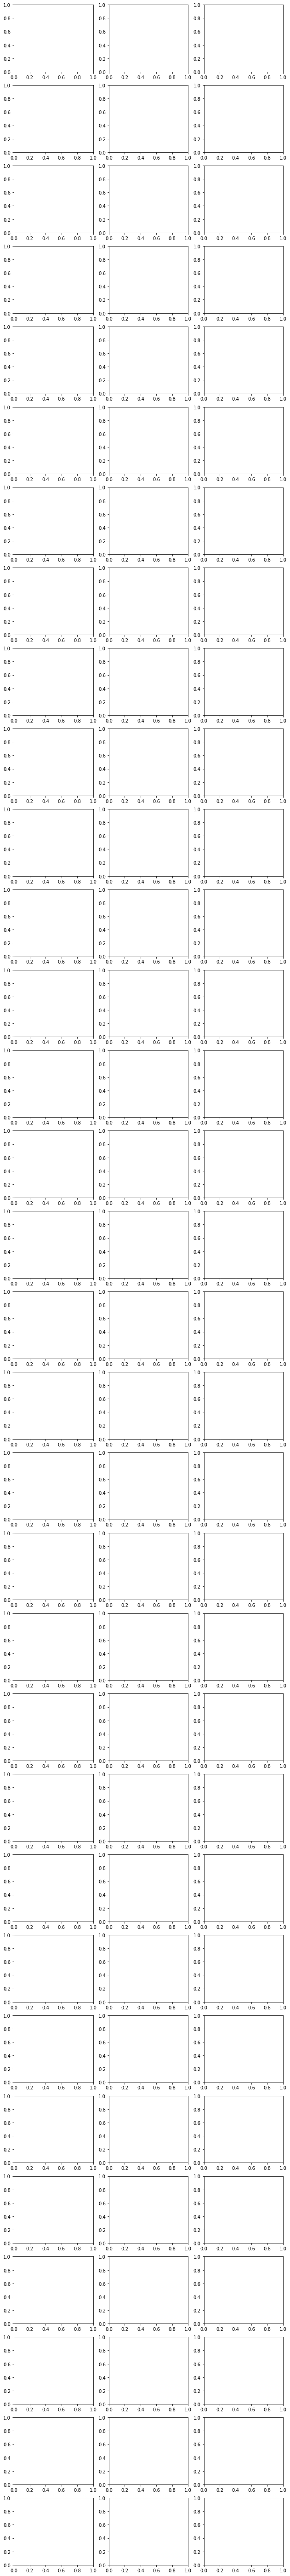

In [22]:
cluster_pairs_plot(pairs=df_mikro, labels=df_mikro, show_cluster_of=df_mikro)